In [78]:
%matplotlib notebook

In [79]:
# Import Dependencies
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt

csv_path = os.path.join("..","spotify_data_all.csv")
audio_path = os.path.join("..","merged_audio_chart.csv")

audio_analysis_df = pd.read_csv(csv_path, encoding='latin1')

mean_duration = audio_analysis_df['duration_s'].mean()
mean_duration_m_s = str(mean_duration // 60 ) + ":" + str(mean_duration % 60)
print(f"Average song length: {mean_duration_m_s}")


major_minor = audio_analysis_df['mode']
minor = major_minor.value_counts()[0]
major = major_minor.value_counts()[1]
print(f"Songs in a major key {major}")
print(f"Songs in a minor key {minor}")

energy_level = audio_analysis_df['energy']
bins = [0, 0.25, 0.50, 0.75, 1]
labels = ["low energy","low-medium energy", "high-medium energy", "high-energy"]
audio_analysis_df["Bins"] = pd.cut(energy_level, bins=bins, labels=labels, right=False)
print(audio_analysis_df["Bins"].value_counts())


Average song length: 3.0:26.469293333333326
Songs in a major key 871
Songs in a minor key 629
Bins
high-medium energy    866
high-energy           313
low-medium energy     288
low energy             33
Name: count, dtype: int64


In [80]:
audio_analysis_df

,song,artist,track_id,duration_s,energy,tempo,mode,time_signature,valence,key,Bins
0,Back In Blood,Pooh Shiesty,7FGdjbZ32vMybPuP0IuE7d,184.490,0.538,146.933,0,4,0.831,8,high-medium energy
1,Sugar,Maroon 5,2iuZJX9X9P0GKaE93xcPjk,235.493,0.788,120.076,1,4,0.884,1,high-energy
2,Blue Christmas,Elvis Presley,3QiAAp20rPC3dcAtKtMaqQ,129.173,0.270,94.518,1,4,0.580,4,low-medium energy
3,We Paid,Lil Baby,6gxKUmycQX7uyMwJcweFjp,181.929,0.542,135.140,1,4,0.564,1,high-medium energy
4,Sleigh Ride,The Ronettes,5ASM6Qjiav2xPe7gRkQMsQ,181.267,0.772,91.751,1,4,0.853,2,high-energy
...,...,...,...,...,...,...,...,...,...,...,...
1495,No Limit,Usher,1CDBn2Lm7E63XKQDsdCq6O,228.613,0.523,127.047,0,4,0.282,10,high-medium energy
1496,Dick,StarBoi3,3nY8AqaMNNHHLYV4380ol0,175.238,0.608,125.994,1,4,0.474,9,high-medium energy
1497,For You (Fifty Shades Freed) (& Rita Ora),Liam Payne,66xn6tB8s3l8uhj02OGneE,245.453,0.787,113.000,0,4,0.200,2,high-energy
1498,Rocking A Cardigan in Atlanta,lil Shordie Scott,0N0h5lXc4HOiLgGb9EZi8m,96.826,0.640,140.073,1,4,0.816,1,high-medium energy


In [88]:
song_keys_chart = audio_analysis_df.groupby("key")
keysdf = song_keys_chart["key"].count()
keysdf


key
0     162
1     237
2     131
3      32
4      87
5     122
6      98
7     139
8     130
9     120
10    113
11    129
Name: key, dtype: int64

In [89]:
time_sigs = audio_analysis_df.groupby("time_signature")
times = time_sigs["time_signature"].count()
times

time_signature
1       5
3      75
4    1401
5      19
Name: time_signature, dtype: int64

<IPython.core.display.Javascript object>


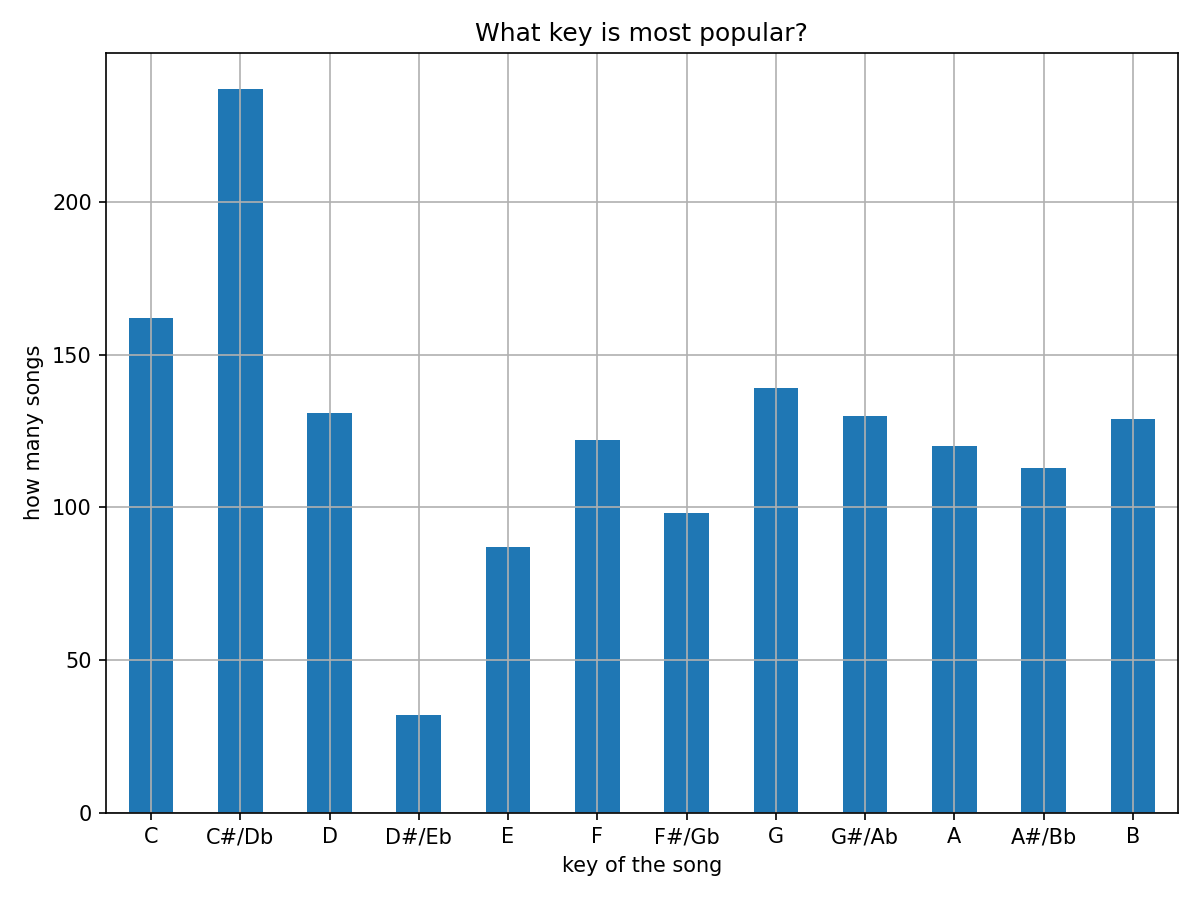

In [92]:

chart1 = keysdf.plot(kind = 'bar', figsize = (8,6))
xticklabels = ['C','C#/Db','D','D#/Eb','E','F','F#/Gb','G','G#/Ab','A','A#/Bb','B']
labels = [item.get_text() for item in chart1.get_xticklabels()]
chart1.set_xticklabels(xticklabels, rotation="horizontal")
chart1.set_xlabel("key of the song")
chart1.set_ylabel("how many songs")
chart1.set_title("What key is most popular?")
plt.grid()
plt.show()
plt.tight_layout()

In [91]:
x = [0,1]
y = [871,629]
labels = ['Major', 'Minor']
plt.bar(x,y)
plt.xticks(x, labels, rotation='horizontal')
plt.show()

In [84]:
energy_level

0       0.538
1       0.788
2       0.270
3       0.542
4       0.772
        ...  
1495    0.523
1496    0.608
1497    0.787
1498    0.640
1499    0.718
Name: energy, Length: 1500, dtype: float64

In [85]:
labels = ('Low','Medium Low','Medium','Medium High','High')
plt.hist(energy_level, bins = 5, edgecolor = "red")
plt.title("Song Energy")
plt.xlabel("energy from low to high")
plt.show()

'..\\merged_audio_chart.csv'